Created by Tito Tamaro <br>
source : https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

# Importing Packages

In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grids
import matplotlib.font_manager as mtfm
import seaborn as sns
import folium
import random
%matplotlib inline
plt.style.use('ggplot')

# Function

In [291]:
def distploting(dataset,feature_to_plot, title,
                logx=False,featlog=[],colorhist="y",colorline="k"):
    if len(feature_to_plot)==2:
        gs = grids.GridSpec(1,2)
        plt.figure(figsize=(25,10))
    else:
        plt.figure(figsize=(25,30))
        gs = grids.GridSpec(5,3)   
    for i, feature in enumerate(feature_to_plot):
        ax = plt.subplot(gs[i])
        sns.distplot(dataset[feature], color=colorhist,
              kde_kws={"color": colorline,
                       "lw": 3,
                       "label": "KDE"})
        if logx==True:
            if feature in featlog:
                ax.set_xlabel('log('+str(feature)+')', size=10)
            else:
                ax.set_xlabel(xlabel=feature, size=10)
        else:
            ax.set_xlabel(xlabel=feature, size=20)
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.legend(prop = mtfm.FontProperties(size=15))
        plt.suptitle(title,size=25,y=0.9)
        
def plot_correlation_matrix(dataframe,title):           
    plt.figure(figsize=(15,15))
    ax = sns.heatmap(dataframe, annot=True, vmin=-1, vmax=1, fmt=".1f", square=True, cmap="RdBu", linewidths=0.5)
    labels = dataframe.columns
    ax.set_xticklabels(labels, fontsize = 8, rotation=90, ha='center', minor=False)
    ax.set_yticklabels(labels, fontsize = 8, rotation=0)
    ax.set_xticks(np.arange(dataframe.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(dataframe.shape[0]) + 0.5, minor=False)
    ax.set_ylim(10,0)
    plt.title(title, size = 25)
    plt.show()
    
def pairplotting(dataframe, title):
    plt.figure(figsize=(12,12))
    ax=sns.pairplot(dataframe, palette='rainbow')
    plt.suptitle(title, size = 20, y=1.05)
    plt.show()

# untuk barplotting saya tidak masukkan ke dalam fungsi karena lebih mudah untuk di-customize

# Inserting Raw Data

In [3]:
df = pd.read_csv(r'AirBNB/AB_NYC_2019.csv')

In [4]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
df.shape

(48895, 16)

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Attribute Information

| Feature | Description | Type | 
|-----------|---|---|
id|ID kamar sewa (semua ID unik, tidak ada yang sama)|integer
name|Deskripsi dari penyewaan yang disediakan, deksripsi ini diberikan oleh host / penyedia kamar sewa|object
host_id|ID penyedia kamar sewa(terdapat beberapa ID yang sama, atau tidak unik)|integer
host_name|Nama penyedia kamar sewa|object
neighbourhood_group|Merupakan lokasi kamar sewa tersebut (dalam istilah daerah di USA disebut borough) |object
neighbourhood|Merupakan lokasi kamar sewa tersebut didalam bagian borough (dalam istilah daerah di USA disebut county)|object
latitude|Koordinat dari kamar sewa (garis bujur)|float
longitude|Koordinat dari kamar sewa (garis lintang)|float
room_type|Tipe ruangan, terdiri dari 3 pilihan yaitu private room, Entire home/apt, dan Shared room|object
price|Harga kamar sewa|integer
minimum_nights|Jumlah minimum waktu sewa (dalam satuan malam)|integer
number_of_reviews|Jumlah review dari customer yang telah melakukan sewa terhadap kamar sewa tersebut|integer
last_review|Waktu saat review terakhir dipost oleh customer untuk kamar sewa tersebut|object
reviews_per_month|Rata-rata jumlah review(bukan jumlah skor) yang didapat kamar sewa tersebut setiap bulan|float
calculated_host_listings_count|Jumlah kamar yang dimiliki oleh seorang host/penyedia kamar sewa|integer
availability_365|Ketersediaan kamar sewa dalam jangka waktu 365 hari (atau 1 tahun)|integer

Airbnb.Inc merupakan perusahaan yang bergerak di bidang penyewaan kamar dengan revenue mencapai 2.6 billion US dollar dan 6300 employee, menjadikan airbnb perusahaan penyewaan kamar terbesar di dunia. Sistem bisnis yang ditawarkan merupakan bagi hasil antara penyedia kamar / host dengan airbnb dimana kamar yang disewakan harus sesuai dengan kriteria airbnb (seperti terdapat toilet paper,sabun,clean sheets,fresh towels(minimum one per guest),bantal(minimum one per guest),ruangan ber AC).
Airbnb tidak hanya berada di USA namun juga diseluruh dunia dengan jumlah 9 juta booking dan 250.000 properti dari kurun waktu 2008-2013. Airbnb sendiri menjadi solusi yang sangat tepat untuk turis / backpacker yang memiliki biaya terbatas, dimana mereka bisa mendapatkan penginapan yang layak dengan harga murah. (sumber:https://en.wikipedia.org/wiki/Airbnb)

Data yang akan dianalisis merupakan data Airbnb di kota New York USA, data ini merupakan aktivitas penyewaan pada tahun 2019 yang sumbernya kemungkinan diambil dari database Aribnb sendiri

# Descriptive Statistics

In [10]:
bsDESC=[] # describe data

for i in df.columns:
    bsDESC.append([
        i, 
        df[i].dtypes, 
        df[i].isnull().sum(), 
        round((((df[i].isnull().sum()) / (len(df))) * 100),2),
        df[i].nunique(), 
        df[i].drop_duplicates().sample(2).values])
dfDesc = pd.DataFrame(bsDESC,columns=['dataFeatures','dataType','nullValues','nullPercentage','unique','sample' ])
dfDesc    

dataFeatures dataType  nullValues  nullPercentage  \
0                               id    int64           0            0.00   
1                             name   object          16            0.03   
2                          host_id    int64           0            0.00   
3                        host_name   object          21            0.04   
4              neighbourhood_group   object           0            0.00   
5                    neighbourhood   object           0            0.00   
6                         latitude  float64           0            0.00   
7                        longitude  float64           0            0.00   
8                        room_type   object           0            0.00   
9                            price    int64           0            0.00   
10                  minimum_nights    int64           0            0.00   
11               number_of_reviews    int64           0            0.00   
12                     last_review   object       10052           20.56   
13               reviews_per_month  float64       10052           20.56   
14  calculated_host_listings_count    int64           0            0.00   
15                availability_365    int64           0            0.00   

    unique                                             sample  
0    48895                                [29514909, 7399449]  
1    47905  [Huge two bedroom in trendy Greenpoint, Bushwi...  
2    37457                               [57412032, 95475481]  
3    11452                                     [Jill S, Elik]  
4        5                                    [Queens, Bronx]  
5      221                      [Spuyten Duyvil, Eastchester]  
6    19048                      [40.6924, 40.673590000000004]  
7    14718                    [-73.95362, -74.08301999999999]  
8        3                        [Shared room, Private room]  
9      674                                         [950, 975]  
10     109                                           [56, 87]  
11     394                                          [25, 178]  
12    1764                           [2016-04-13, 2018-02-25]  
13     937                                       [3.59, 6.57]  
14      47                                            [18, 4]  
15     366                                         [338, 330]

Terdeteksi ada NaN pada data yaitu:

    - Pada kolom name sebanyak 16 buah atau 0.03% ==> dapat di drop
    - Pada kolom host_name sebanyak 21 buah atau 0.04% ==> dapat di drop
    - Pada kolom last_review sebanyak 10052 atau 20.56% ==> dapat di drop, namun jumlahnya cukup besar 
    - Pada kolom reviews_per_month sebanyak 10052 atau 20.56% ==> dapat di drop, namun jumlahnya cukup besar 
    
Karena masing-masing persentase NaN < 50% maka NaN value dapat di drop dan <b>tidak perlu dilakukan imputasi </b>

Dari deskripsi diatas kita dapat membedakan tipe features dalam data yaitu :
    
    - Categorical Features
        - name
        - host_name
        - neighbourhood_group
        - neighbourhood
        - room_type
        - last_review
        
    - Numerical Features
        - ID
        - host_id
        - latitude
        - longitude
        - price
        - minimum_nights
        - number_of_reviews
        - calculated_host_listing_count
        - availability_365

# Drop NaN Values

In [140]:
df_drop = df.dropna()

In [145]:
df_drop.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Drop NaN dipilih daripada melakukan imputasi karena : 

    - Jumlah NaN Value dibawah < 50 %
    - Kolom yang mempunyai nilai NaN adalah kolom nama (deskripsi), host_name, last_review, dan reviews per month, terutama untuk last_review dan reviews per month yang berisi NaN bisa memiliki arti host tersebut sudah tidak aktif lagi atau host tersebut baru membuka tempat penyewaannya. Hal ini tidak relevan dengan EDA yang akan dilakukan dan dapat membuat data menjadi bias.  

## Distributions - Sebelum Drop NaN

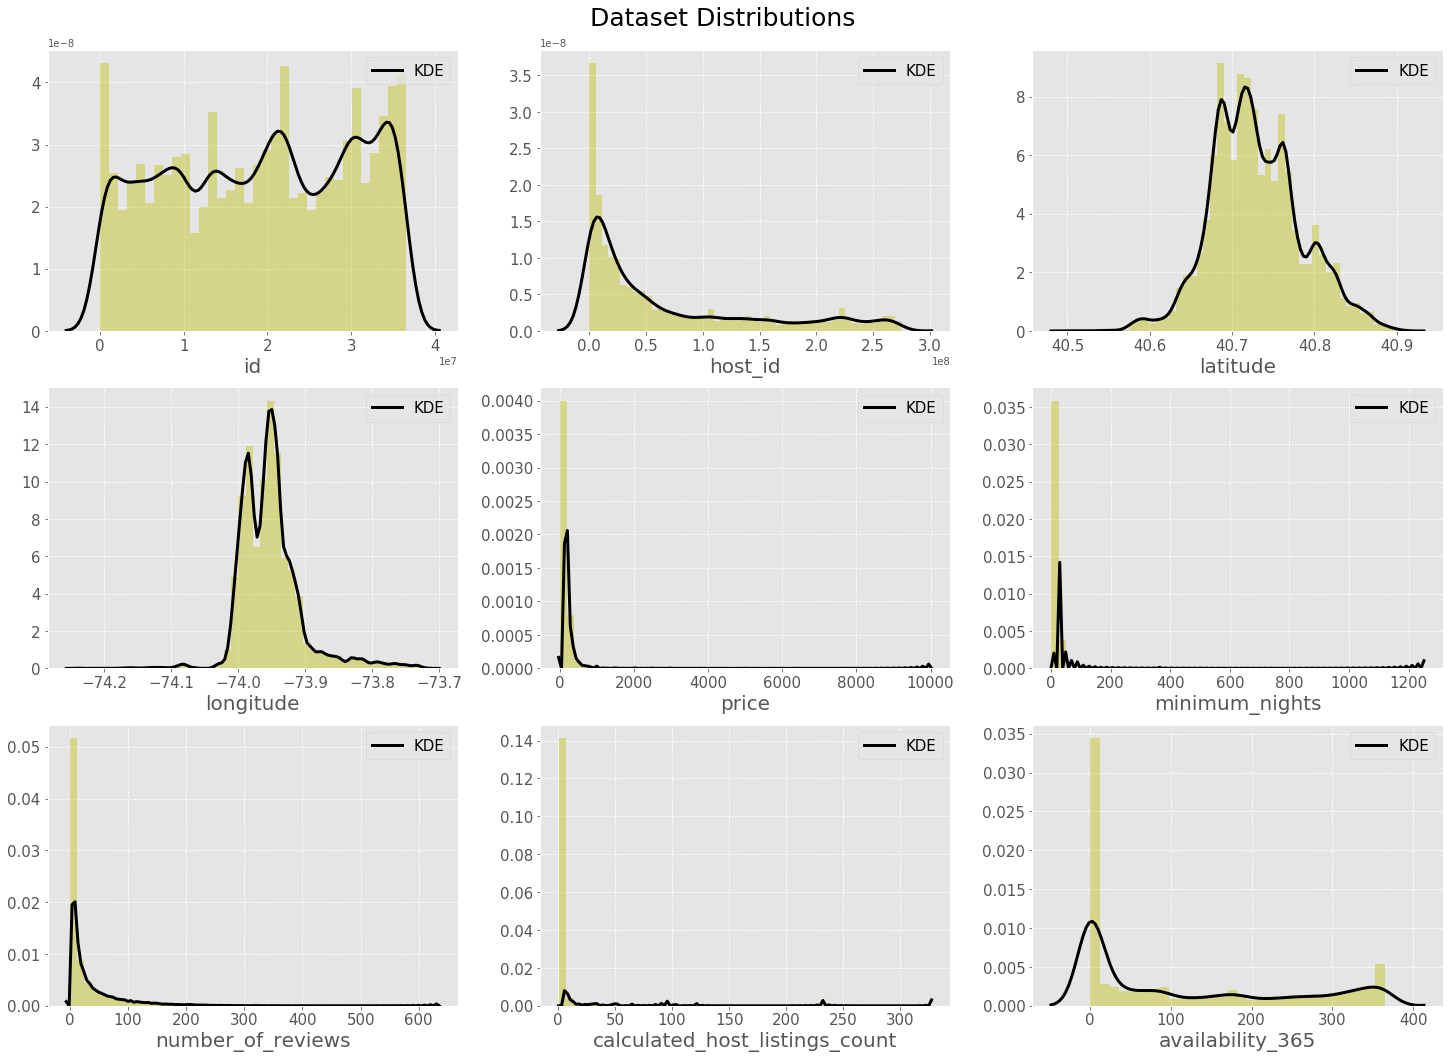

In [52]:
# Distribution plotting hanya bisa dilakukan untuk data dengan tipe integer / numeric values
FEATURES_TO_PLOT = ['id','host_id','latitude','longitude','price', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 'availability_365']
distploting(df, FEATURES_TO_PLOT, title="Dataset Distributions")

##  Distributions - Setelah Drop NaN

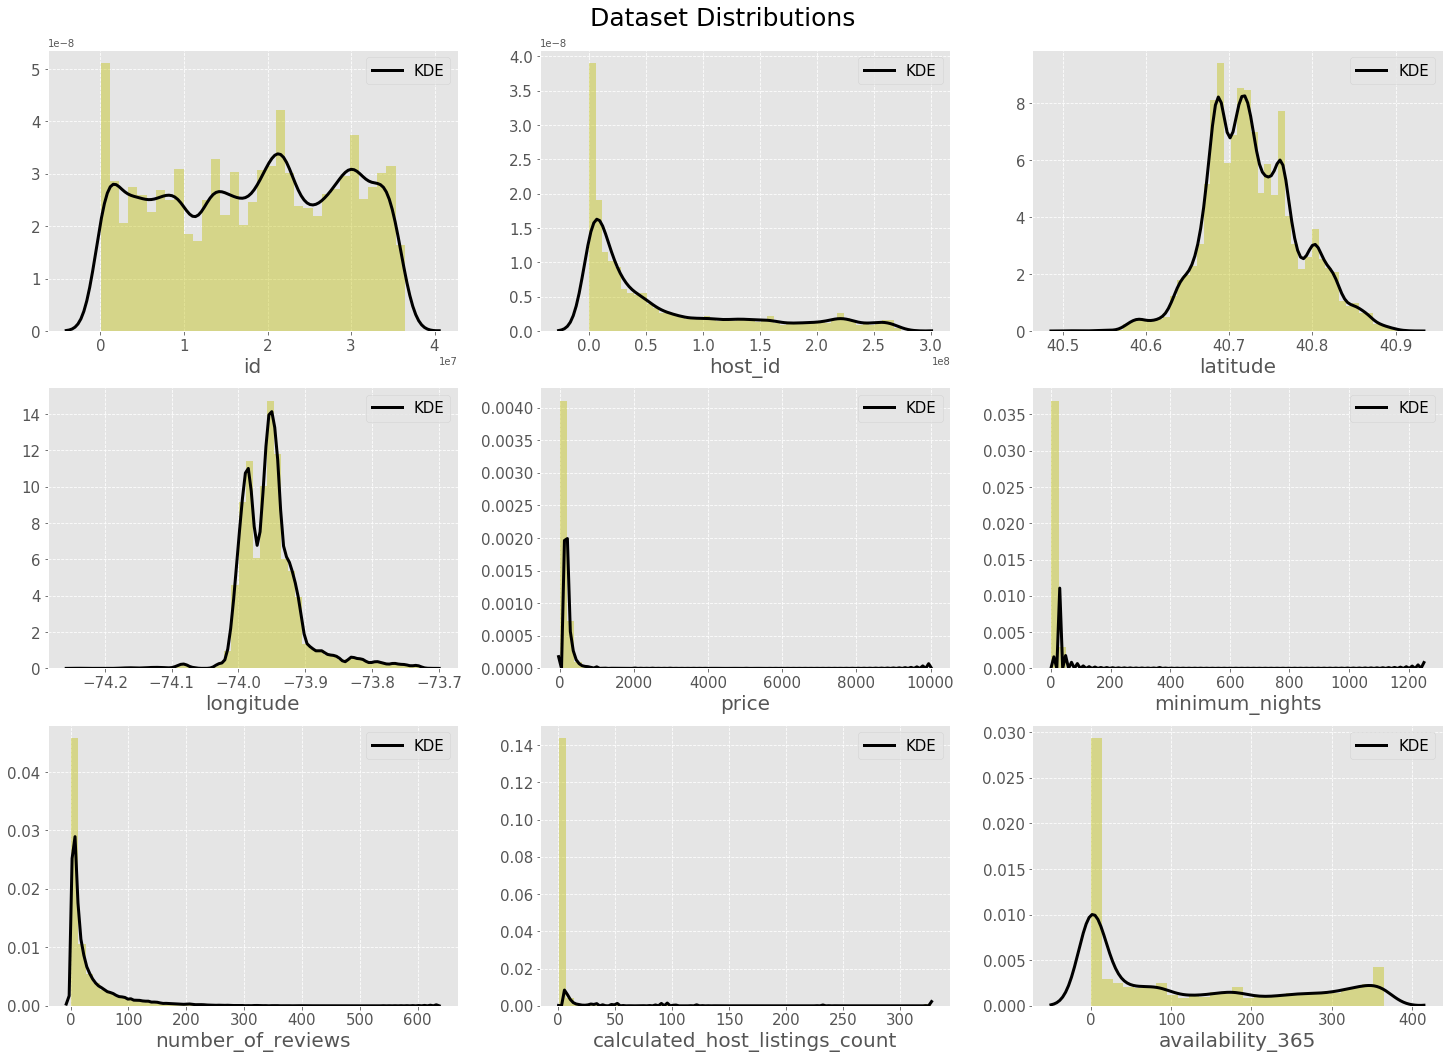

In [142]:
# Setelah dilakukan drop-NaN
FEATURES_TO_PLOT = ['id','host_id','latitude','longitude','price', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 'availability_365']
distploting(df_drop, FEATURES_TO_PLOT, title="Dataset Distributions")

Secara visual tidak terjadi perubahan persebaran data secara siginikan setelah dilakukan drop-NaN

    - Terdapat sedikit perbedaan pada grafik ID, hal ini disebabkan karena seluruh ID adalah unik sehingga sensitif terhadap setiap perubahan data
    - Peak pada minimum_nights berkurang dari 0.015 menjadi 0.011 setelah di drop-NaN
    - Peak pada number_of_reviews menjadi lebih tinggi setelah dilakukan drop-NaN dari 0.02 menjadi 0.03
    
Dari peak pada minimum_nights yang berkurang dapat disimpulkan bahwa terdapat beberapa data yang ikut terbuang setelah drop-NaN, sementara pada number_of_reviews terdapat penambahan tinggi peak. Hal ini mungkin disebabkan oleh kalkulasi yang dilakukan komputer menggunakan panjang data dalam algoritmanya, karena panjang data berkurang maka peak menjadi semakin tinggi, perlu diingat data number_of_reviews merupakan numerical values bukan kategorikal

## Correlation Matrix - Sebelum Drop NaN

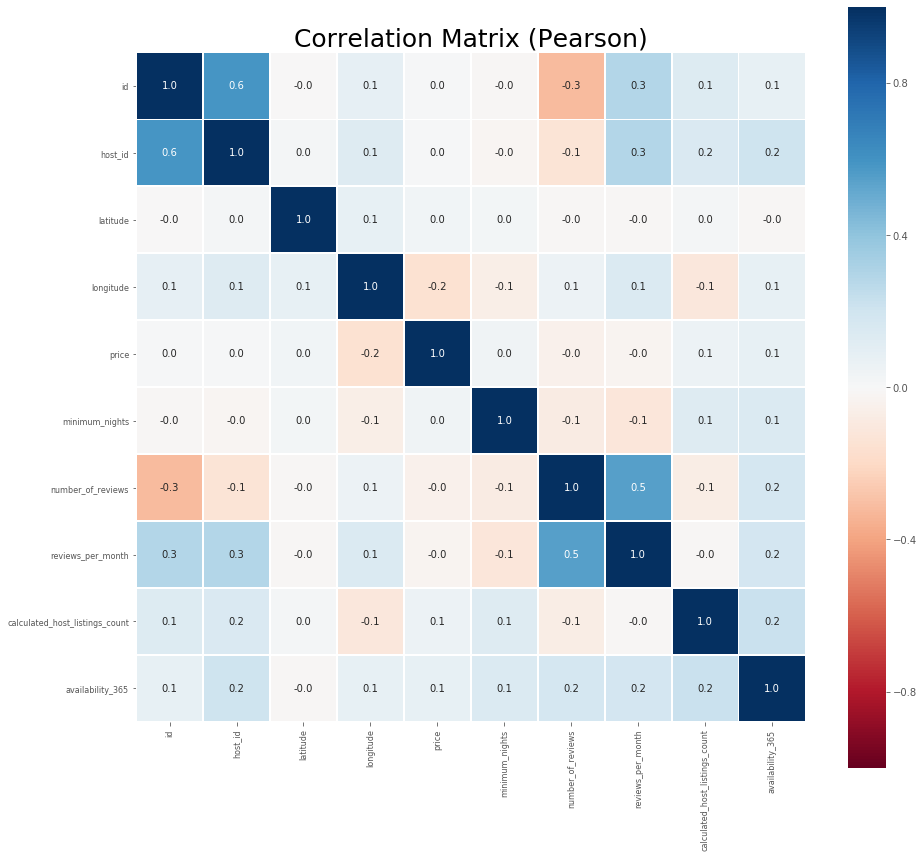

In [51]:
plot_correlation_matrix(df.corr(),title='Correlation Matrix (Pearson)')

## Correlation Matrix - Setelah Drop NaN

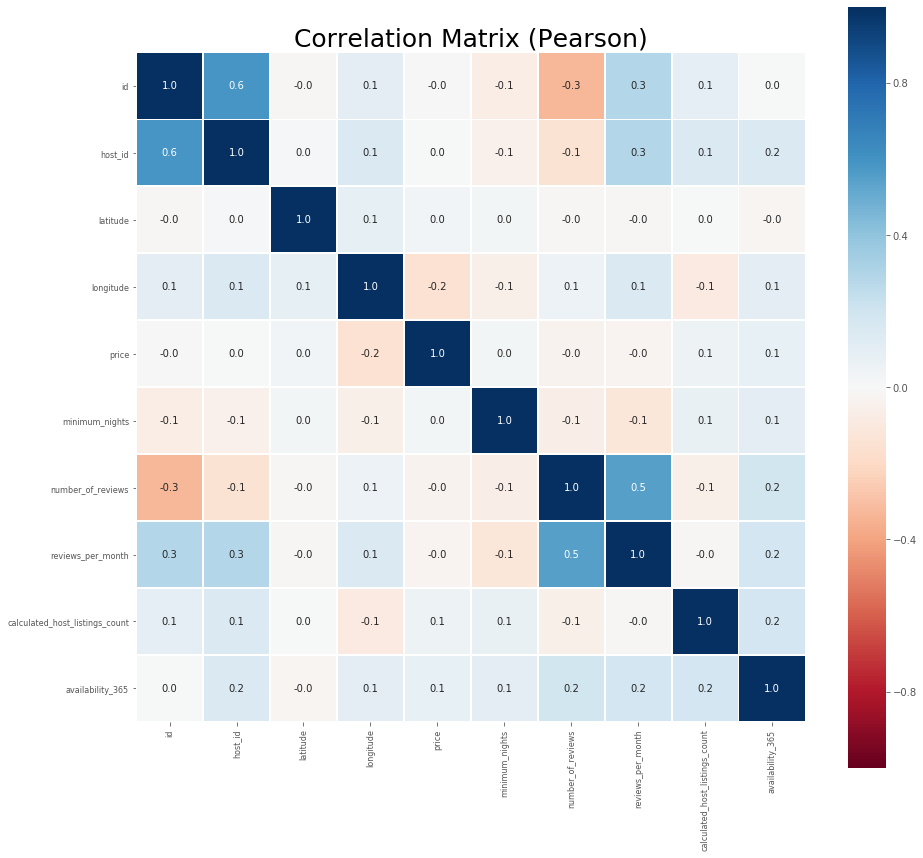

In [143]:
# Setelah drop NaN Values
plot_correlation_matrix(df_drop.corr(),title='Correlation Matrix (Pearson)')

Pada heatmap korelasi tidak dapat diambil kesimpulan yang kuat karena skor < 0.7

In [146]:
df.describe().T

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               38843.0  1.373221e+00  1.680442e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

In [147]:
df_drop.describe().T

count          mean           std  \
id                              38821.0  1.810081e+07  1.069372e+07   
host_id                         38821.0  6.424582e+07  7.589752e+07   
latitude                        38821.0  4.072813e+01  5.499074e-02   
longitude                       38821.0 -7.395115e+01  4.669296e-02   
price                           38821.0  1.423325e+02  1.969948e+02   
minimum_nights                  38821.0  5.869220e+00  1.738903e+01   
number_of_reviews               38821.0  2.929026e+01  4.818290e+01   
reviews_per_month               38821.0  1.373229e+00  1.680328e+00   
calculated_host_listings_count  38821.0  5.166611e+00  2.630295e+01   
availability_365                38821.0  1.148863e+02  1.295299e+02   

                                       min           25%           50%  \
id                              2539.00000  8.721444e+06  1.887286e+07   
host_id                         2438.00000  7.029525e+06  2.837092e+07   
latitude                          40.50641  4.068864e+01  4.072171e+01   
longitude                        -74.24442 -7.398246e+01 -7.395481e+01   
price                              0.00000  6.900000e+01  1.010000e+02   
minimum_nights                     1.00000  1.000000e+00  2.000000e+00   
number_of_reviews                  1.00000  3.000000e+00  9.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  5.500000e+01   

                                         75%           max  
id                              2.756746e+07  3.645581e+07  
host_id                         1.018905e+08  2.738417e+08  
latitude                        4.076299e+01  4.091306e+01  
longitude                      -7.393502e+01 -7.371299e+01  
price                           1.700000e+02  1.000000e+04  
minimum_nights                  4.000000e+00  1.250000e+03  
number_of_reviews               3.300000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.290000e+02  3.650000e+02

- Mean Price Original > Mean Price setelah Drop NaN 
- Mean Minimum Nights Original > Mean Minimum Nights setelah Drop NaN
- Mean Number of Reviews Original < Mean Number of Reviews setelah Drop NaN
- Mean calc_host_listings_count Original < Mean calc_host_listings_count setelah Drop NaN
- Mean Availability Original < Mean Availability setelah Drop NaN

In [164]:
perbandingan = pd.DataFrame([df.median(),df_drop.median()])
perbandingan.set_index([['original','drop_NaN']]).T

original      drop_NaN
id                              1.967728e+07  1.887286e+07
host_id                         3.079382e+07  2.837092e+07
latitude                        4.072307e+01  4.072171e+01
longitude                      -7.395568e+01 -7.395481e+01
price                           1.060000e+02  1.010000e+02
minimum_nights                  3.000000e+00  2.000000e+00
number_of_reviews               5.000000e+00  9.000000e+00
reviews_per_month               7.200000e-01  7.200000e-01
calculated_host_listings_count  1.000000e+00  1.000000e+00
availability_365                4.500000e+01  5.500000e+01

- Median Price Original > Median Price setelah Drop NaN 
- Median Minimum Nights Original > Median Minimum Nights setelah Drop NaN
- Median Number of Reviews Original < Median Number of Reviews setelah Drop NaN
- Median calc_host_listings_count Original = Median calc_host_listings_count setelah Drop NaN
- Median Availability Original < Median Availability setelah Drop NaN

Dapat ditarik kesimpulan bahwa statistical properties dari data original dan data setelah di drop NaN valuesnya memiliki kecenderungan yang sama 

In [36]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Features Analysis

Agar memperoleh insight yang lebih dalam, maka akan dilakukan EDA per features yang ada <br>
Analisis pengaruh dari features yang lain juga akan dilakukan pada bagian ini
Data selanjutnya yang digunakan adalah data <b>setelah</b> drop NaN Values

In [395]:
df=df_drop

### ID

In [396]:
df['id'].is_unique

True

In [397]:
df['id'].nunique()

38821

ID merupakan label unik yang dimiliki data, secara nyata ID meingidentifikasi setiap kamar sewa yang disewakan oleh Airbnb. Walaupun kamar dapat disewakan oleh host yang sama, dalam alamat atau bangunan yang sama setiap kamar pasti akan memiliki <b>ID yang berbeda</b>

### Name

In [398]:
df['name'].is_unique

False

In [399]:
df['name'].nunique()

38253

In [400]:
df['name'].sample(10)

4609                          Large 1-bedroom in Brooklyn
2525                  Greenwich Village 1BR Fantastic Apt
4679                         Quintessential Brooklyn...!!
38524                                        Harlem Oasis
28682                   Light & Quiet Chelsea One Bedroom
7816                  Chambre Privée près de Central Park
21544               One bedroom apt right on Franklin Ave
9093                  Artist home, Greenwich Village, NYC
17302                  Spacious 1 bedroom in Woodlawn NYC
1914     Queen-sized Room Avail in Huge 2 bdrm/2bth loft.
Name: name, dtype: object

In [401]:
df['name'].str.len().max()

161

In [402]:
df['name'].str.len().min()

1

In [403]:
len(df['name'][0])

34

In [404]:
df['name'].str.len().mean()

36.98523994745112

Feature 'name' merupakan deskripsi yang dibuat oleh penyewa / host tentang fasilitas yang disediakan, dimana panjang karakternya <b>maksimal 161 karakter dan minimal 1 dengan rata-rata 37 karakter</b>.

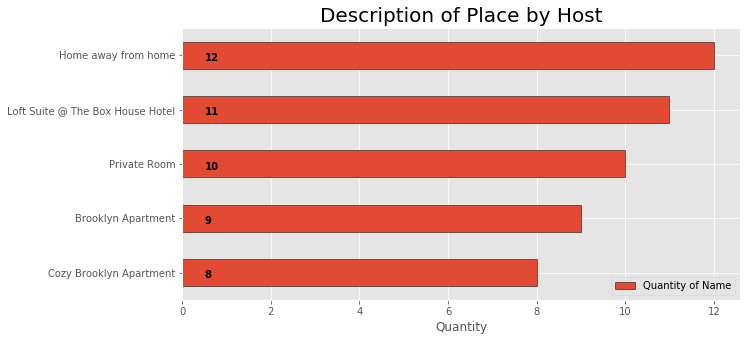

In [405]:
name = df['name'].value_counts().head()[::-1] # labeling pada y-axis 

diagram = df['name'].value_counts().head()[::-1].plot(kind='barh',figsize=(10,5),edgecolor='k')
plt.title('Description of Place by Host',size=20)
plt.xlabel('Quantity')
for i in range(0,5):
    plt.text(0.5,i-0.1,name[i],fontweight='bold')
plt.legend(['Quantity of Name'])
plt.show()

Dari segi nama / deskripsi, yang paling sering dipakai adalah : 

    - Home away from home
    - New york Multi-unit building
    - Brooklyn Apartment
    - Private room
    - Cozy Brooklyn Apartment
    
- Hillside hotel merupakan hotel kelas menengah yang lokasinya dekat dengan bandara JFK, USA dimana sering dijadikan tempat menginap untuk turis dengan budget sedang ke bawah. Banyak kamar disewakan lewat airbnb untuk mempermudah marketing kamar (sumber:https://hillsidehotelnyc.com/), apabila menggunakan df sebelum NaN values di drop, jumlah ini merupakan yang paling besar namun karena adanya drop NaN Hillside Hotel menjadi tidak termasuk dalam deskripsi yang paling sering dipakai.
- New york Multi-unit building juga deskripsi yang sering dipakai karena di new york terdapat 77000 bangunan dan 1 juta kamar apartemen, sehingga wajar apabila ini menjadi deskripsi yang dipakai oleh host (sumber:https://www.quora.com/How-many-apartment-buildings-are-there-in-NYC-exclude-condo-co-ops)

### Feature Engineering - Name

In [295]:
df['panjang_karakter'] = df['name'].str.len()
drop=df.drop(['latitude','longitude','last_review','id','host_id','host_name'],axis=1)

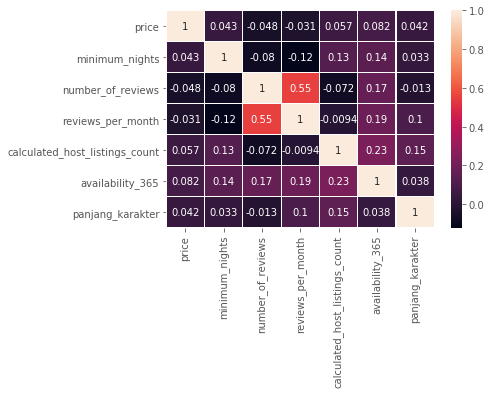

<Figure size 1080x1080 with 0 Axes>

In [305]:
x = sns.heatmap(drop.corr(),annot=True,linewidths=0.2)
plt.figure(figsize=(15,15))
x.set_ylim (7,0)
plt.show()

Dari diagram korelasi di atas dapat dilihat bahwa <b>tidak terdapat korelasi antara panjang karakter pada feature nama / deskripsi dengan feature yang lain</b>

### Host ID & Host_Name

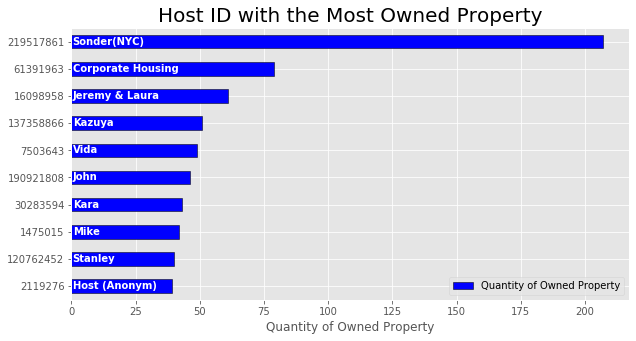

In [411]:
x = df['host_id'].value_counts().head(10)[::-1].plot(kind='barh',figsize=(10,5),edgecolor='k',color = 'b')
storage_name = ['Host (Anonym)','Stanley','Mike','Kara','John','Vida','Kazuya','Jeremy & Laura','Corporate Housing','Sonder(NYC)']
plt.title('Host ID with the Most Owned Property',size=20)
plt.xlabel('Quantity of Owned Property')
plt.legend(['Quantity of Owned Property'])
for i in range (0,10):
     plt.text(0.5,i-0.1,storage_name[i],fontweight='bold',color='white')
plt.show()

In [410]:
df['host_id'].value_counts().head(10)[::-1]

2119276       39
120762452     40
1475015       42
30283594      43
190921808     46
7503643       49
137358866     51
16098958      61
61391963      79
219517861    207
Name: host_id, dtype: int64

In [456]:
df['host_name'].nunique()

9885

Berikut adalah nama penyewa kamar dengan jumlah terbanyak:

- Sonder(NYC) (207)
- Corporate Housing (79)
- Jeremy & Laura (61)
- Kazuya (51)
- Vida (49)
- John (46)
- Kara (43)
- Mike (42)
- Stanley (40)
- Host(Anonym) (39)

Sonder merupakan start-up bisnis yang mirip dengan airbnb, singkatnya mereka seperti re-seller yang menjual kembali barang dagangan untuk memperoleh untung. Dalam penyewa dengan jumlah kamar terbanyak terdapat 2 Sonder yaitu Sonder,dan Sonder (NYC). Startup ini sudah termasuk start-up unicorn dan tergolong start-up besar <br> (sumber: https://www.businessinsider.com/differences-between-sonder-apartment-and-airbnb-rental-2019-12?r=US&IR=T#2-my-sonder-rental-had-its-own-separate-elevator-bank-2)

Blueground merupakan corporate housing yang memiliki property seperti apartemen dan rumah, untuk memperbesar keuntungan maka biasanya apartemen atau rumah yang kosong disewakan lewat airbnb (sumber: https://www.theblueground.com/corporate-housing-in-new-york)

### Neighbourhood Group

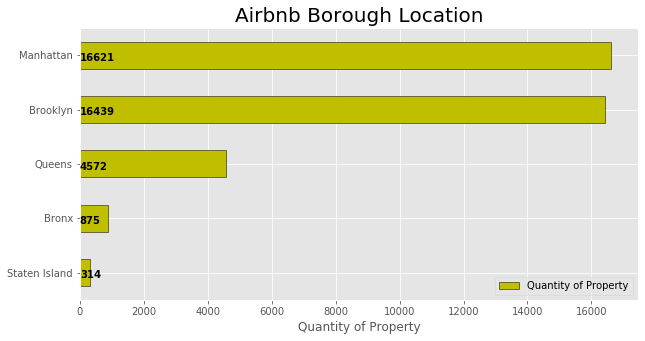

In [417]:
name = df['neighbourhood_group'].value_counts()[::-1]
df['neighbourhood_group'].value_counts()[::-1].plot(kind='barh',figsize=(10,5),edgecolor='k', color='y')
plt.title('Airbnb Borough Location',size=20)
plt.xlabel('Quantity of Property')
for i in range(0,5):
    plt.text(0.5,i-0.1,name[i],fontweight='bold')
plt.legend(['Quantity of Property'])
plt.show()

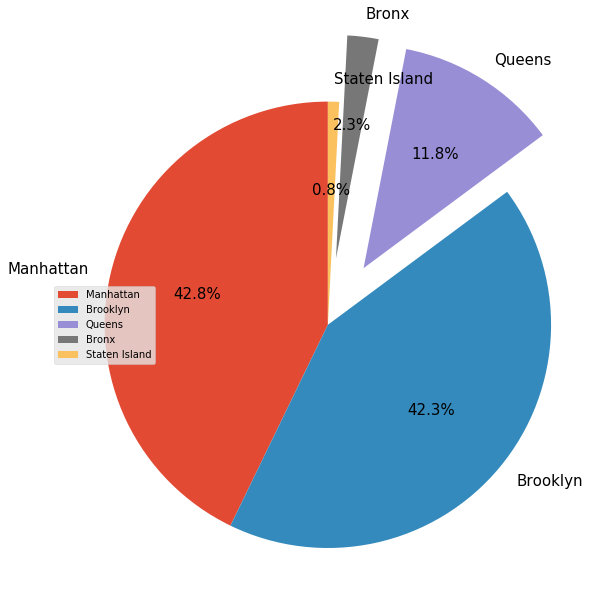

In [450]:
z = df['neighbourhood_group'].value_counts()
nama=['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
explode = (0,0,0.3,0.3,0)

plt.figure(figsize=(10,15))
plt.pie (z,labels= nama,startangle=90,explode=explode,
        shadow= False,textprops={"size":15, "color":"k"},
        autopct = "%1.1f%%", radius=1)
plt.legend(loc=6)
plt.show()

Borough dengan jumlah kamar sewa terbanyak adalah : 

    - Manhattan (16621)
    - Brooklyn (16439)
    - Queens (4572)
    - Bronx (875)
    - Staten Island (314)
    
Jumlah kamar sewa terbesar ada di Manhattan dan Brooklyn yang merupakan bagian kota terpadat di New York 

### Neighbourhood

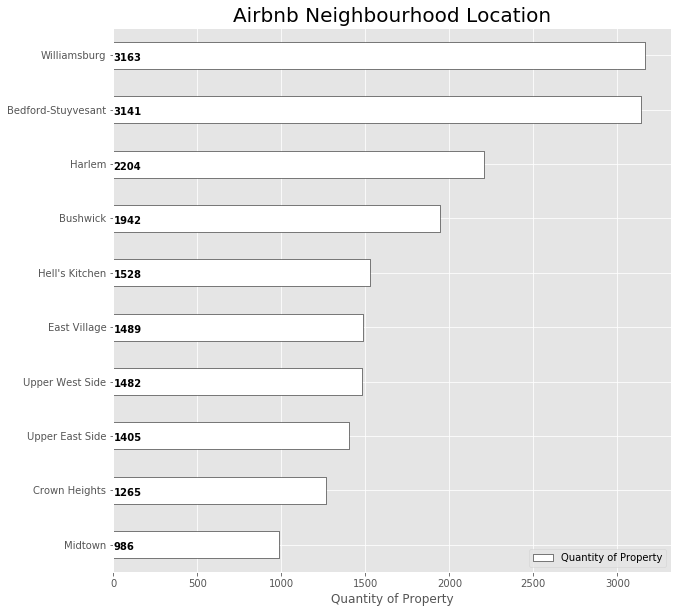

In [451]:
name = df['neighbourhood'].value_counts().head(10)[::-1]
df['neighbourhood'].value_counts().head(10)[::-1].plot(kind='barh',figsize=(10,10),edgecolor='k',color='white')
plt.title('Airbnb Neighbourhood Location',size=20)
plt.xlabel('Quantity of Property')
for i in range(0,10):
    plt.text(0.5,i-0.1,name[i],fontweight='bold')
plt.legend(['Quantity of Property'])
plt.show()

Neighbourhood dengan jumlah kamar sewa terbanyak adalah : 

    - Williamsburg (3163)
    - Bedford-Stuyvesant (3141)
    - Harlem (2204)
    - Bushwick (1942)
    - Hell's Kitchen (1528)
    - East Village (1489)
    - Upper West Side (1482)
    - Upper East Side (1405)
    - Crown Heights (1265)
    - Midtown (986)

In [453]:
print(df['neighbourhood'].unique())

['Kensington' 'Midtown' 'Clinton Hill' 'East Harlem' 'Murray Hill'
 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side' 'Chinatown'
 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene' 'Chelsea'
 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood' 'East Village'
 'Harlem' 'Greenpoint' 'Bushwick' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Flatbush' 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands'
 'Cobble Hill' 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George'
 'Highbridge' 'Financial District' 'Ridgewood' 'Morningside Heights'
 'Jamaica' 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Eastchester' 'Kingsbridge' 'Two Bridges'
 'Rockaway Beach' 'Forest Hills' 'Nolita' 'Woodlawn' 'University Heights'
 'Gramercy' 'Allerton' 'East New Y

### Latitude & Longitude

In [479]:
m = folium.Map(
location = [40.7, -73.9],
tiles='OpenStreetMap',
zoom_start = 10 
)

for i in range(0, 1500):
    num = random.randint(0,len(df))
    folium.Marker(
    [df.iloc[num]['latitude'], df.iloc[num]['longitude']],
    popup = f'{df.iloc[num]["name"]}',
    icon = folium.Icon(colors='blue',icon='info-sign')).add_to(m)

m

Secara sekilas dapat dilihat bahwa distribusi lokasi rumah sewa Airbnb banyak terdapat <b>di area barat laut New York</b><br>
(Dalam 1x run hanya bisa 1500 koordinat karena keterbatasan komputer, tapi sudah dicoba di run 5x)

In [549]:
y = df.pivot_table(index=['latitude', 'longitude'], values='price')
koordinat_harga = y.sort_values(by='latitude',ascending=False).head(100)
koordinat_harga

price
latitude longitude       
40.91306 -73.89389   40.0
40.91234 -73.89417   40.0
40.91167 -73.89566   40.0
40.90804 -73.90005   53.0
40.90484 -73.84489  120.0
...                   ...
40.88437 -73.89746   32.0
40.88435 -73.90305  145.0
40.88393 -73.90639   50.0
40.88344 -73.90301   45.0
40.88316 -73.90586   30.0

[100 rows x 1 columns]

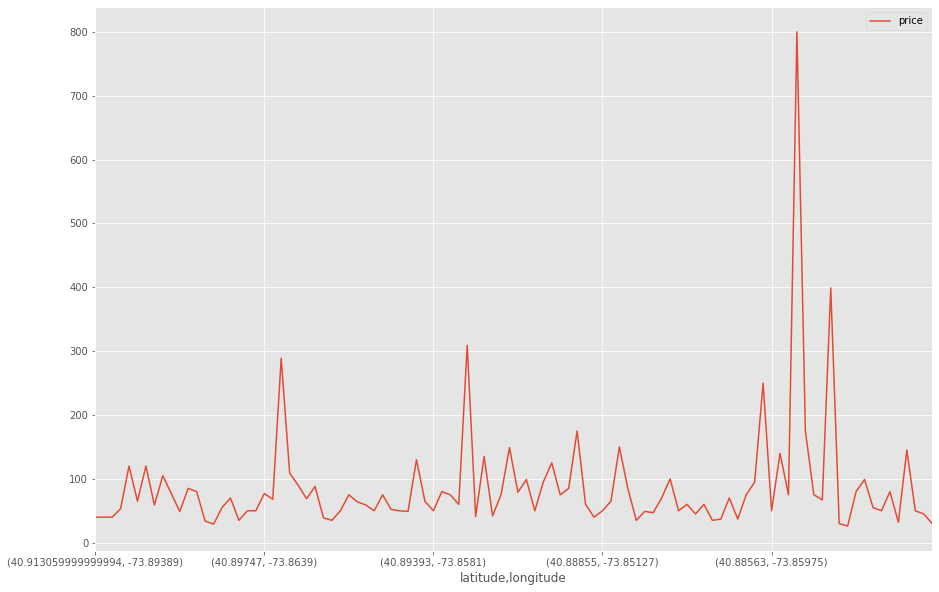

In [550]:
koordinat_harga.plot(kind='line',figsize=(15,10))

Dari koordinat daerah terdapat peak harga pada daerah dengan koordinat (40.88563 dan -73.85975), terdapat juga daerah dengan peak pada koordinat (40.89747,-73.8639) dan (40.89393, -738581). Dari pergerakan grafik harga ini dapat disimpulkan bahwa harga sewa airbnb di kota New York <b>cenderung semakin mahal ke arah selatan</b> (nomor latitude semakin kecil)

### Room Type

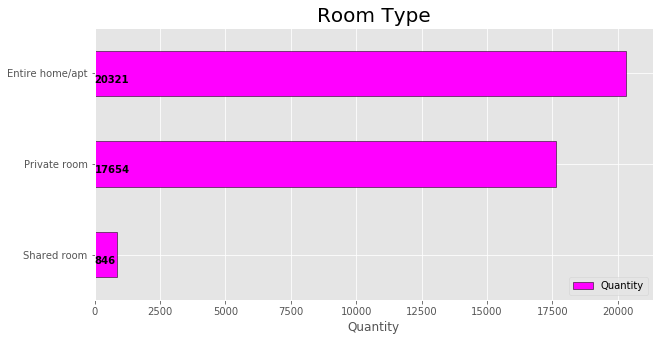

In [478]:
name = df['room_type'].value_counts()[::-1]
df['room_type'].value_counts()[::-1].plot(kind='barh',figsize=(10,5),edgecolor='k',color='magenta')
plt.title('Room Type',size=20)
plt.xlabel('Quantity')
for i in range(0,3):
    plt.text(0.5,i-0.1,name[i],fontweight='bold')
plt.legend(['Quantity'])
plt.show()

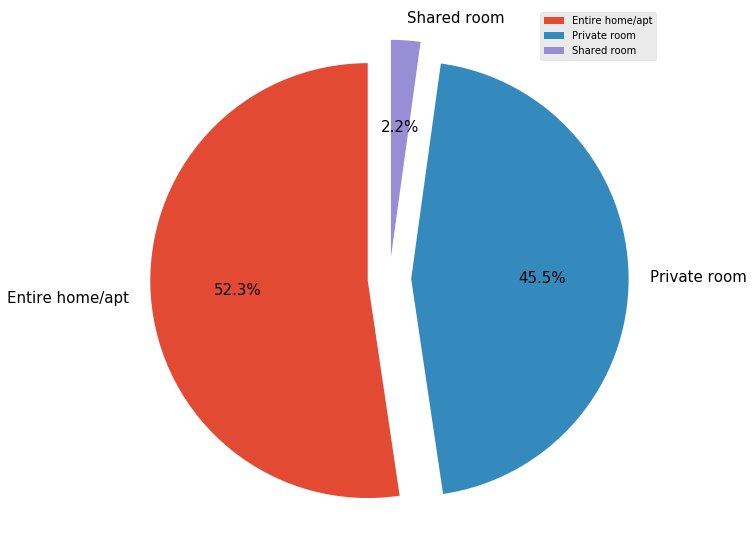

In [477]:
z = df['room_type'].value_counts()
nama=['Entire home/apt', 'Private room', 'Shared room']
explode = (0.1,0.1,0.1)

plt.figure(figsize=(10,10))
plt.pie (z,labels= nama,startangle=90,explode=explode,
        shadow= False,textprops={"size":15, "color":"k"},
        autopct = "%1.1f%%", radius=1)
plt.legend(loc=1)
plt.show()

Dapat dilihat bahwa terdapat 3 kategori pada penyewaan kamar di Airbnb yaitu:

    - Entire home / apt (20321 / 52.3%)
    - Private room (17654 / 45.5%)
    - Shared Room (864 / 2.2%)

In [640]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [646]:
price_category=df.drop(['id','name','host_id','host_name','calculated_host_listings_count','availability_365','last_review'],axis=1)

price_category.groupby(['room_type','neighbourhood_group'])['price'].mean()

room_type        neighbourhood_group
Entire home/apt  Bronx                  120.938312
                 Brooklyn               171.281897
                 Manhattan              230.200964
                 Queens                 139.225603
                 Staten Island          125.366667
Private room     Bronx                   57.093511
                 Brooklyn                73.349562
                 Manhattan              106.607488
                 Queens                  69.302838
                 Staten Island           57.584906
Shared room      Bronx                   56.930233
                 Brooklyn                45.458621
                 Manhattan               77.980337
                 Queens                  64.467105
                 Staten Island           57.600000
Name: price, dtype: float64

Secara rata-rata harga berdasarkan jenis kamar sewa dan neighbourhood group, Manhattan merupakan yang paling mahal disusul oleh Brooklyn dan Queens.<br>
Secara tipe harga yang paling mahal berturut-turut ada di jenis penyewaan entire home/apt, private room dan shared room

### Price

Price merupakan target dari EDA ini, maka analisis akan dititikberatkan di bagian ini

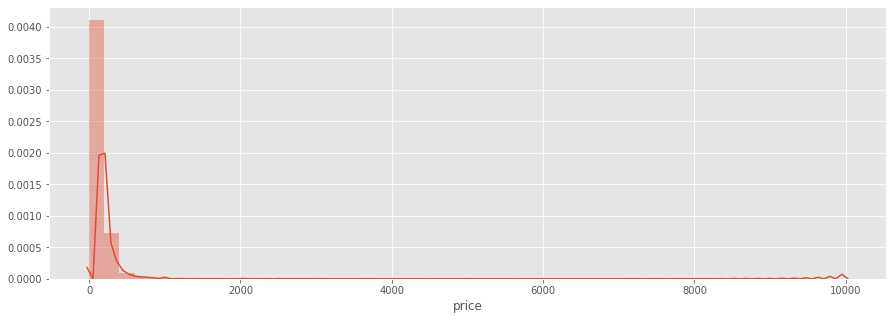

In [565]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])
plt.show()

Persebaran harga terkonsentrasi di bawah angka 750, untuk area ini akan ditelaah lebih dalam

In [630]:
under_750 = df[df['price']<750]
len(under_750)

38521

In [636]:
under_750.describe()

id       host_id      latitude     longitude         price  \
count  3.852100e+04  3.852100e+04  38521.000000  38521.000000  38521.000000   
mean   1.810133e+07  6.423364e+07     40.728075    -73.950954    132.169129   
std    1.069205e+07  7.589543e+07      0.055084      0.046744     95.263150   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420      0.000000   
25%    8.729771e+06  7.039858e+06     40.688580    -73.982330     68.000000   
50%    1.887464e+07  2.837092e+07     40.721530    -73.954650    100.000000   
75%    2.755942e+07  1.019706e+08     40.763020    -73.934800    166.000000   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990    749.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    38521.000000       38521.000000       38521.000000   
mean         5.852911          29.389606           1.376849   
std         17.324423          48.306827           1.683482   
min          1.000000           1.000000           0.010000   
25%          1.000000           3.000000           0.190000   
50%          2.000000           9.000000           0.720000   
75%          4.000000          33.000000           2.030000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    38521.000000      38521.000000  
mean                         5.186158        114.018691  
std                         26.401541        129.094126  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         54.000000  
75%                          2.000000        226.000000  
max                        327.000000        365.000000

In [638]:
under_750.pivot_table(index=['neighbourhood_group'], values='price', aggfunc=['sum', 'min', 'max', 'median', 'mean'])

sum   min   max median        mean
                       price price price  price       price
neighbourhood_group                                        
Bronx                  68814     0   670   64.5   78.734554
Brooklyn             1889815     0   745   93.0  115.429697
Manhattan            2684786    10   749  140.0  163.746402
Queens                419623    10   700   72.0   91.921796
Staten Island          28249    13   625   75.0   89.964968

Dapat dilihat setelah difilter untuk harga yang paling tinggi frekuensinya (<750) rata-rata harga dikelompokkan berdasarkan neighbourhood_group adalah:

    - Manhattan
    - Brooklyn
    - Queens
    - Staten Island
    - Bronx

<Figure size 864x864 with 0 Axes>

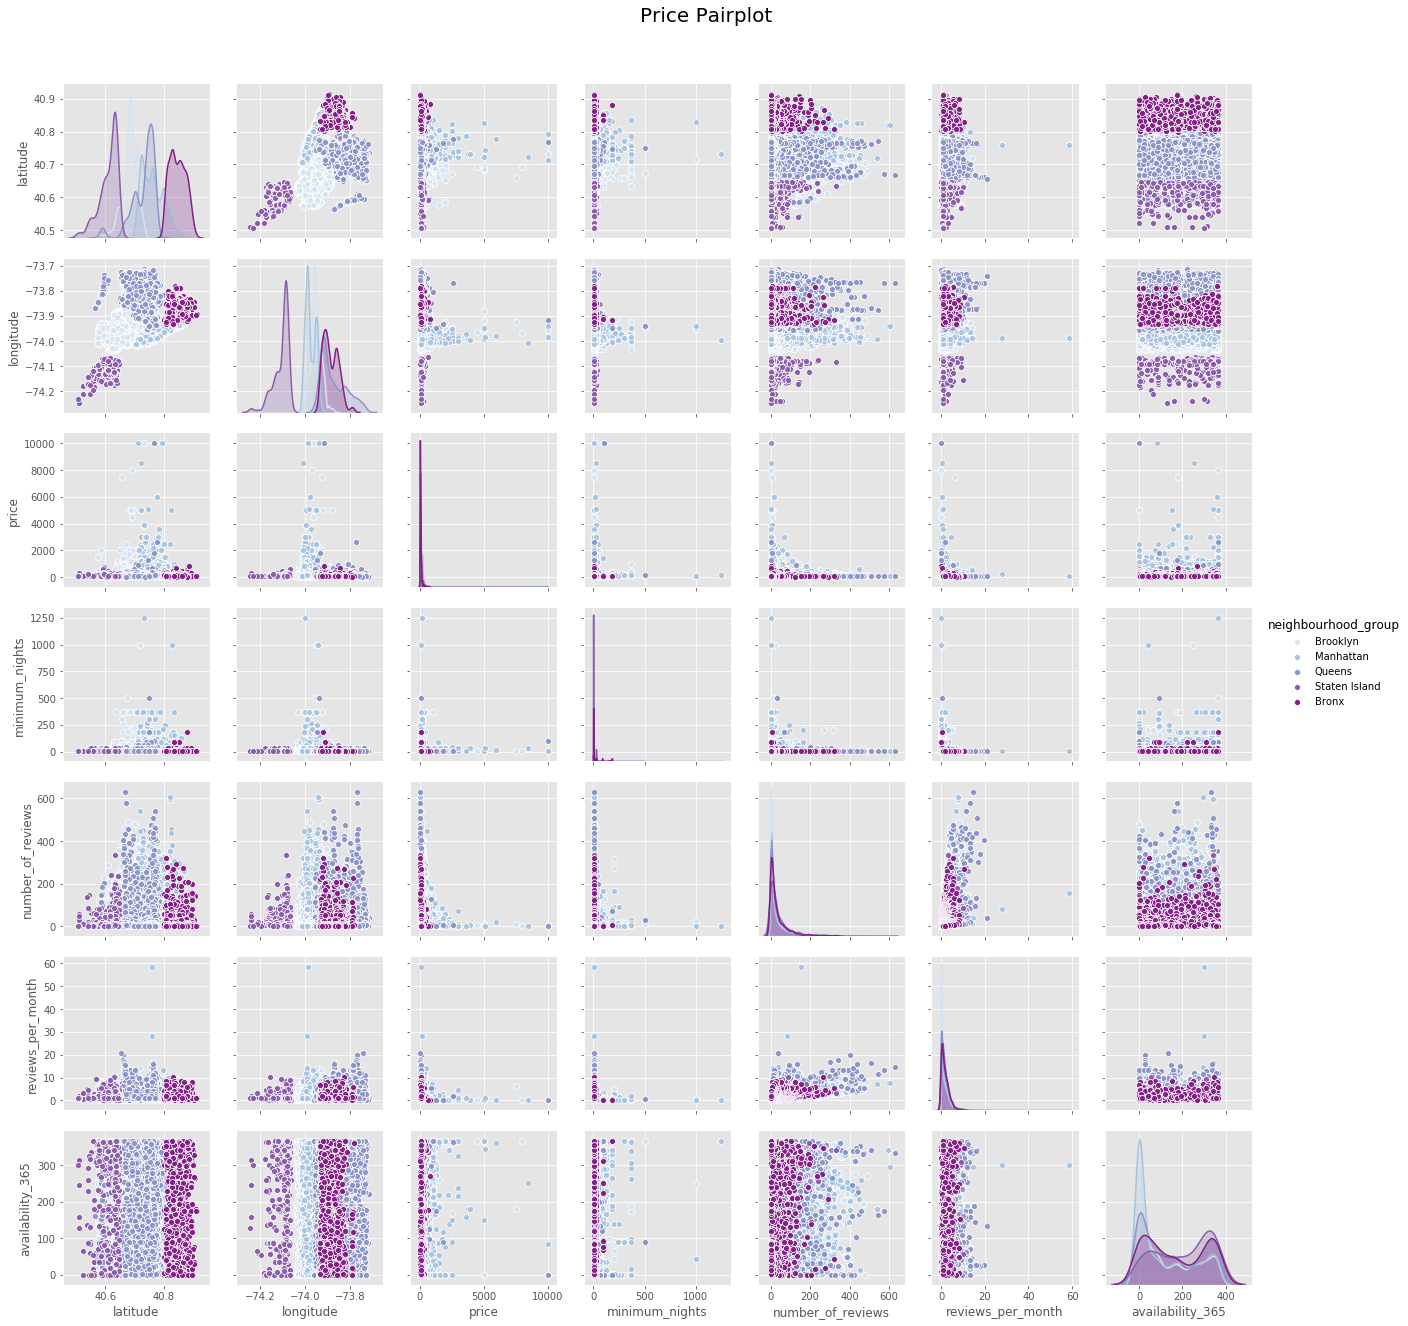

In [624]:
price_drop=df.drop(['id','name','host_id','host_name','calculated_host_listings_count'],axis=1)

plt.figure(figsize=(12,12))
ax=sns.pairplot(price_drop, palette='BuPu',hue='neighbourhood_group')
plt.suptitle("Price Pairplot", size = 20, y=1.05)
plt.show()

Perhatikan kolom price

Dalam kolom price ada beberapa info dan korelasi yang bisa diambil terhadap feature lain yaitu:

    - Dalam segi review area Manhattan dan Queen memiliki jumlah review yang banyak, sebaliknya jumlah review di Brooklyn paling sedikit
    - Dari segi harga, harga sewa tertinggi ada di daerah Manhattan
    - Availability hanya berpengaruh sedikit terhadap harga, terutama yang di daerah Bronx
    - Minumum nights tidak berpengaruh terhadap harga

### Minimum Nights

In [555]:
df['minimum_nights'].describe()

count    38821.000000
mean         5.869220
std         17.389026
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [579]:
df[df['minimum_nights']>365]

id                                 name    host_id   host_name  \
1305     568684  800sqft apartment with huge terrace    2798644  Alessandra   
5767    4204302     Prime W. Village location 1 bdrm   17550546   Genevieve   
7355    5431845  Beautiful Fully Furnished 1 bed/bth    3680008       Aliya   
11193   8668115   Zen Room in Crown Heights Brooklyn    8996336       Laura   
13404  10053943   Historic Designer 2 Bed. Apartment    2697686    Glenn H.   
26341  20990053      Beautiful place in Brooklyn! #2  151084261       Angie   

      neighbourhood_group      neighbourhood  latitude  longitude  \
1305             Brooklyn           Bushwick  40.70202  -73.92402   
5767            Manhattan  Greenwich Village  40.73293  -73.99782   
7355               Queens   Long Island City  40.75104  -73.93863   
11193            Brooklyn      Crown Heights  40.67255  -73.94914   
13404           Manhattan             Harlem  40.82915  -73.94034   
26341            Brooklyn       Williamsburg  40.71772  -73.95059   

             room_type  price  minimum_nights  number_of_reviews last_review  \
1305   Entire home/apt    115             370                  6  2018-04-15   
5767   Entire home/apt    180            1250                  2  2014-11-09   
7355   Entire home/apt    134             500                 30  2018-06-24   
11193     Private room     50             500                 10  2016-09-22   
13404  Entire home/apt     99             999                  2  2018-01-04   
26341     Private room     79             999                 24  2018-06-28   

       reviews_per_month  calculated_host_listings_count  availability_365  
1305                0.09                               1               365  
5767                0.03                               1               365  
7355                0.57                               1                90  
11193               0.22                               1               365  
13404               0.07                               1                42  
26341               1.12                               6               249

In [580]:
df[df['minimum_nights']>365].price.mean()

109.5

Terdapat 6 tempat yang memiliki waktu minimal menginap di atas 1 tahun, bahkan ada yang mengharuskan menginap di atas 1250 hari. Hal ini bisa saja typo yang dilakukan oleh host, karena dari distribusi data rerata lama menginap kurang lebih 5 hari. Hal ini diperkuat dengan rata-rata harga 109.5 dollar per malam dimana tidak terlalu mahal dan dekat dengan mean harga keseluruhan data

### Number of Reviews

In [567]:
df['number_of_reviews'].describe()

count    38821.000000
mean        29.290255
std         48.182900
min          1.000000
25%          3.000000
50%          9.000000
75%         33.000000
max        629.000000
Name: number_of_reviews, dtype: float64

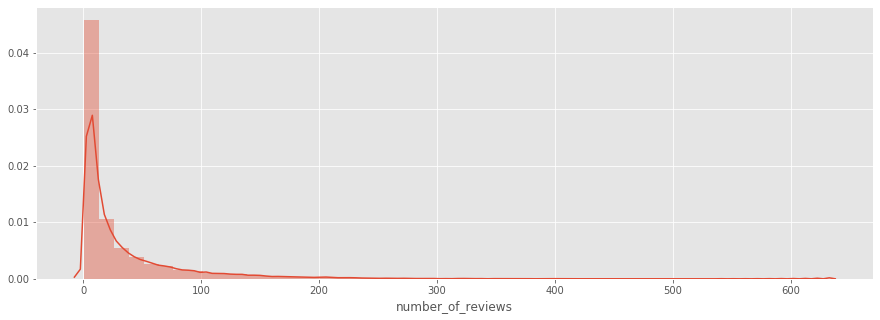

In [573]:
plt.figure(figsize=(15,5))
sns.distplot(df['number_of_reviews'])
plt.show()

### Reviews per Month 

In [600]:
df['reviews_per_month'].describe()

count    38821.000000
mean         1.373229
std          1.680328
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [601]:
len(df[df['reviews_per_month']>13])

27

In [605]:
df[df['reviews_per_month']>13].sort_values(by='price',ascending=False)

id                                               name    host_id  \
46937  35495582  ★ AMAZING★  TIME SQUARE/ 2 Bedroom 3 Bed Apart...  266992480   
42076  32678720           Great Room in the heart of Times Square!  244361589   
44764  34392081  Hello! This is a very cozy space in Williamsburg.  259630588   
42077  32678721   Nice Room 1 block away from Times Square action!  244361589   
42075  32678719  Enjoy great views of the City in our Deluxe Room!  244361589   
40025  31086198        6 minutes from JFK Private Bedroom/Bathroom  232251881   
44281  34150120  2 bed.Full apartment. L Train.15 min away from...  257832461   
27287  21550302  JFK Comfort.5 Mins from JFK Private Bedroom & ...  156684502   
41954  32611321   Amazing apartment close to midtown with skylight   27287203   
36238  28826608                                 “For Heaven Cakes”  217379941   
40297  31249784        Studio Apartment 6 minutes from JFK Airport  232251881   
22104  17779504  Relaxing Quiet Room Just 6 Mins from JFK Airport!  121391142   
46057  35055076           Balcony with Room! Close to LGA and JFK.  256290334   
21879  17587000                Private bedroom 8 mins-JFK&The Mall   55125246   
7086    5115372  Comfy Room Family Home LGA Airport NO CLEANING...   26432133   
21187  16814205                           Cozy Room Close to JFK!!  111841534   
28651  22176831      JFK 2 Comfort 5 Mins from JFK Private Bedroom  156684502   
29628  22750161      JFK 3 Comfort 5 Mins from JFK Private Bedroom  156684502   
25249  20196339    Private Guest Suite  Less than 10 min to JFK :)    7097558   
22469  18173787  Cute Tiny Room Family Home by LGA NO CLEANING FEE   26432133   
21517  17222454   Sun Room Family Home LGA Airport NO CLEANING FEE   26432133   
20403  16276632  Cozy Room Family Home LGA Airport NO CLEANING FEE   26432133   
11759   9145202                            Room near JFK Queen Bed   47621202   
13495  10101135                            Room Near JFK Twin Beds   47621202   
38870  30423106                 Lou's Palace-So much for so little  228415932   
40036  31090222            6 Minutes From JFK Airport Cozy Bedroom  232251881   
37093  29489893   Beautiful furnished private studio with backyard  222098649   

       host_name neighbourhood_group        neighbourhood  latitude  \
46937        Sam           Manhattan       Hell's Kitchen  40.76573   
42076    Row NYC           Manhattan     Theater District  40.75828   
44764      Alina            Brooklyn         Williamsburg  40.71863   
42077    Row NYC           Manhattan     Theater District  40.75783   
42075    Row NYC           Manhattan     Theater District  40.75918   
40025   Lakshmee              Queens  Springfield Gardens  40.66670   
44281  Stephanie            Brooklyn             Bushwick  40.70247   
27287    Nalicia              Queens  Springfield Gardens  40.66110   
41954        Ben           Manhattan      Upper West Side  40.79887   
36238      Brent              Queens  Springfield Gardens  40.66457   
40297   Lakshmee              Queens              Jamaica  40.66793   
22104    Deloris              Queens  Springfield Gardens  40.66535   
46057    Aisling              Queens        Richmond Hill  40.70254   
21879     Yvonne              Queens              Jamaica  40.68638   
7086    Danielle              Queens        East Elmhurst  40.76374   
21187     Malini              Queens              Jamaica  40.67949   
28651    Nalicia              Queens  Springfield Gardens  40.66158   
29628    Nalicia              Queens  Springfield Gardens  40.66298   
25249     Louise              Queens     South Ozone Park  40.66941   
22469   Danielle              Queens        East Elmhurst  40.76380   
21517   Danielle              Queens        East Elmhurst  40.76367   
20403   Danielle              Queens        East Elmhurst  40.76335   
11759       Dona              Queens              Jamaica  40.66730   
13495       Dona              Queens    

Dapat dilihat pada tabel terdapat 27 kamar sewa airbnb dengan jumlah review diatas 13 per bulannya (tertinggi dalam data).
Selanjutnya akan dicek apakah ada hubungan antara jumlah review, harga

<Figure size 864x864 with 0 Axes>

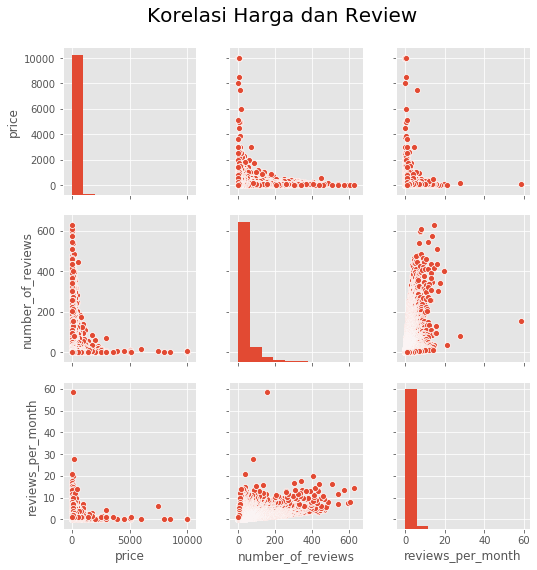

In [611]:
df_korelasi_harga_review = df.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group','neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'last_review', 'calculated_host_listings_count','availability_365'],axis=1)
pairplotting(df_korelasi_harga_review, 'Korelasi Harga dan Review')

Dapat dilihat hubungan antara harga, reviews per month, dan jumlah review dimana jumlah review <b>sedikit lebih signifikan</b> terhadap harga dibandingkan jumlah review per bulannya

### Availability 365

In [614]:
df['availability_365'].describe()

count    38821.000000
mean       114.886299
std        129.529950
min          0.000000
25%          0.000000
50%         55.000000
75%        229.000000
max        365.000000
Name: availability_365, dtype: float64

In [648]:
avail=df.drop(['id','name','host_id','host_name','calculated_host_listings_count','last_review'],axis=1)

avail.groupby('availability_365')['price'].mean()

availability_365
0      126.722682
1      126.850136
2      136.116667
3      133.151079
4      129.641148
          ...    
361    157.400000
362    203.279661
363    190.303030
364    205.458472
365    213.976219
Name: price, Length: 366, dtype: float64

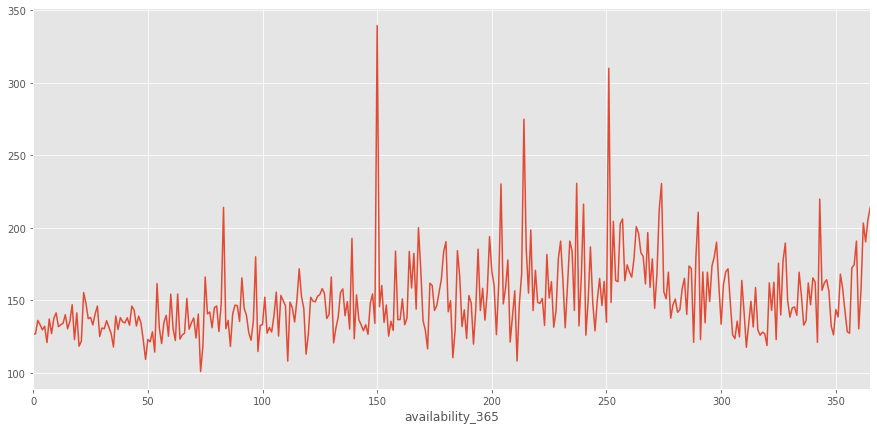

In [650]:
avail.groupby('availability_365')['price'].mean().plot(kind='line',figsize=(15,7))

Rata-rata harga memiliki kecenderungan tinggi di feature availability = 150, dan cenderung naik untuk nilai > 150

# Kesimpulan

1. Terdeteksi ada NaN pada data yaitu:

    - Pada kolom name sebanyak 16 buah atau 0.03% ==> dapat di drop
    - Pada kolom host_name sebanyak 21 buah atau 0.04% ==> dapat di drop
    - Pada kolom last_review sebanyak 10052 atau 20.56% ==> dapat di drop, namun jumlahnya cukup besar 
    - Pada kolom reviews_per_month sebanyak 10052 atau 20.56% ==> dapat di drop, namun jumlahnya cukup besar 
    
Karena masing-masing persentase NaN < 50% maka NaN value dapat di drop dan <b>tidak perlu dilakukan imputasi </b>

2. Secara visual tidak terjadi perubahan persebaran data secara siginikan setelah dilakukan drop-NaN

    - Terdapat sedikit perbedaan pada grafik ID, hal ini disebabkan karena seluruh ID adalah unik sehingga sensitif terhadap setiap perubahan data
    - Peak pada minimum_nights berkurang dari 0.015 menjadi 0.011 setelah di drop-NaN
    - Peak pada number_of_reviews menjadi lebih tinggi setelah dilakukan drop-NaN dari 0.02 menjadi 0.03
    
Dari peak pada minimum_nights yang berkurang dapat disimpulkan bahwa terdapat beberapa data yang ikut terbuang setelah drop-NaN, sementara pada number_of_reviews terdapat penambahan tinggi peak. Hal ini mungkin disebabkan oleh kalkulasi yang dilakukan komputer menggunakan panjang data dalam algoritmanya, karena panjang data berkurang maka peak menjadi semakin tinggi, perlu diingat data number_of_reviews merupakan numerical values bukan kategorikal

3. Dapat ditarik kesimpulan bahwa statistical properties dari data original dan data setelah di drop NaN valuesnya memiliki kecenderungan yang sama 

- Median Price Original > Median Price setelah Drop NaN 
- Median Minimum Nights Original > Median Minimum Nights setelah Drop NaN
- Median Number of Reviews Original < Median Number of Reviews setelah Drop NaN
- Median calc_host_listings_count Original = Median calc_host_listings_count setelah Drop NaN
- Median Availability Original < Median Availability setelah Drop NaN

4. Dari diagram korelasi di atas dapat dilihat bahwa <b>tidak terdapat korelasi antara panjang karakter pada feature nama / deskripsi dengan feature yang lain</b>

5. Berikut adalah nama penyewa kamar dengan jumlah terbanyak:

- Sonder(NYC) (207)
- Corporate Housing (79)
- Jeremy & Laura (61)
- Kazuya (51)
- Vida (49)
- John (46)
- Kara (43)
- Mike (42)
- Stanley (40)
- Host(Anonym) (39)

6. Borough dengan jumlah kamar sewa terbanyak adalah : 

    - Manhattan (16621)
    - Brooklyn (16439)
    - Queens (4572)
    - Bronx (875)
    - Staten Island (314)
    
Jumlah kamar sewa terbesar ada di Manhattan dan Brooklyn yang merupakan bagian kota terpadat di New York 

7. Secara rata-rata harga berdasarkan jenis kamar sewa dan neighbourhood group, Manhattan merupakan yang paling mahal disusul oleh Brooklyn dan Queens.<br>
Secara tipe harga yang paling mahal berturut-turut ada di jenis penyewaan entire home/apt, private room dan shared room

8. Setelah difilter untuk harga yang paling tinggi frekuensinya (<750) rata-rata harga dikelompokkan berdasarkan neighbourhood_group adalah:

    - Manhattan
    - Brooklyn
    - Queens
    - Staten Island
    - Bronx
    
9. Dari pairplot price:

    - Dalam segi review area Manhattan dan Queen memiliki jumlah review yang banyak, sebaliknya jumlah review di Brooklyn paling sedikit
    - Dari segi harga, harga sewa tertinggi ada di daerah Manhattan
    - Availability hanya berpengaruh sedikit terhadap harga, terutama yang di daerah Bronx
    - Minumum nights tidak berpengaruh terhadap harga
  
10. Terdapat 6 tempat yang memiliki waktu minimal menginap di atas 1 tahun, bahkan ada yang mengharuskan menginap di atas 1250 hari. Hal ini bisa saja typo yang dilakukan oleh host, karena dari distribusi data rerata lama menginap kurang lebih 5 hari. Hal ini diperkuat dengan rata-rata harga 109.5 dollar per malam dimana tidak terlalu mahal dan dekat dengan mean harga keseluruhan data

11. Rata-rata harga memiliki kecenderungan tinggi di feature availability = 150, dan cenderung naik untuk nilai > 150

12. Dari koordinat daerah terdapat peak harga pada daerah dengan koordinat (40.88563 dan -73.85975), terdapat juga daerah dengan peak pada koordinat (40.89747,-73.8639) dan (40.89393, -738581). Dari pergerakan grafik harga ini dapat disimpulkan bahwa harga sewa airbnb di kota New York <b>cenderung semakin mahal ke arah selatan</b> (nomor latitude semakin kecil)

13. Secara sekilas dapat dilihat bahwa distribusi lokasi rumah sewa Airbnb banyak terdapat <b>di area barat laut New York</b><br>

14. Neighbourhood dengan jumlah kamar sewa terbanyak adalah : 

    - Williamsburg (3163)
    - Bedford-Stuyvesant (3141)
    - Harlem (2204)
    - Bushwick (1942)
    - Hell's Kitchen (1528)
    - East Village (1489)
    - Upper West Side (1482)
    - Upper East Side (1405)
    - Crown Heights (1265)
    - Midtown (986)